In [1]:
import pymongo
import pandas as pd
from pymongo import MongoClient
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import statistics
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api  import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.statespace.varmax import VARMAX

import warnings
warnings.filterwarnings('ignore')

In [2]:
#MongoDB creation

client = MongoClient()

In [3]:
# connect to a Mongo client. This connects on the default host and port)
from pymongo import MongoClient
client = MongoClient('mongodb://192.168.56.30:27017')

In [4]:
# creating database 
db = client["price_index"]


In [5]:
#add a collection to that database
collection = db['data_collection']


In [7]:
##To insert a single document into a collection##
posts = db.posts
post_id = posts.insert_one(post).inserted_id
post_id

In [ ]:
##Retrieving document
import pprint
pprint.pprint(posts.find_one())

In [ ]:
##count documents
posts.count_documents({})

In [8]:
##conect collection with database
data = db.posts

In [9]:
##convert collection to dataframe
data = pd.DataFrame(list(data.find()))

In [10]:
data

,_id,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,625d4dc34d368beb7897d887,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,...,,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,625d4dc64d368beb7897d888,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,625d4dc74d368beb7897d889,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,625d4dc74d368beb7897d88a,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,...,,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,625d4dc84d368beb7897d88b,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,625d4e2a4d368beb7897d903,Urban,2016,June,125.9,143.9,130.9,131.0,110.2,135.5,...,125.5,115.5,123.2,120.6,112.3,119.9,129.3,118.8,119.6,128.1
125,625d4e2b4d368beb7897d904,Rural+Urban,2016,June,127.7,140.5,128.3,132.6,115.5,136.5,...,125.5,123.3,126.4,124.1,114.2,121.7,129.7,119.4,121.5,130.1
126,625d4e2b4d368beb7897d905,Rural,2016,July,129.3,139.5,129.6,134.5,119.5,138.5,...,NA,128.2,130.0,126.7,116.4,125.2,130.8,120.9,123.8,133.0
127,625d4e2c4d368beb7897d906,Urban,2016,July,126.8,144.2,136.6,131.8,111.0,137.0,...,126.4,115.5,123.5,120.9,111.7,120.3,130.8,120.0,119.9,129.0


In [ ]:
#DATA PREPROCEESING
#Data cleaning, detecting missing value
#sum of missing values
pd.isnull(data).sum().sum()

In [11]:
#detect a list of missing values
missing_vals = ["NA", "", None, np.NaN]
missing = data.isin(missing_vals)
missing.head()

,_id,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#column Housing missing values
print(data['Housing'])

In [12]:
#convert column housing type 
data["Housing"] = pd.to_numeric(data.Housing, errors='coerce')

<AxesSubplot:xlabel='Housing'>

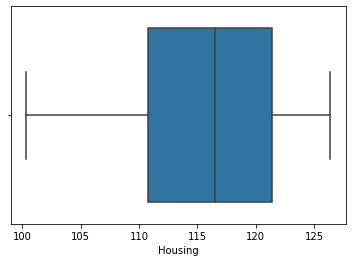

In [13]:
# Box plot and distribution plot for decising whether to use mean, media or mode
# Box plot 
sns.boxplot(data.Housing)

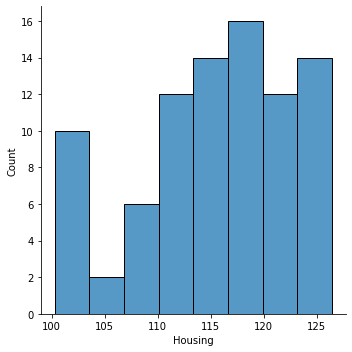

In [14]:
sns.displot(data.Housing)

In [16]:
# Replace Blank values with DataFrame.replace() methods.
data = data.replace(r'^\s*$', np.nan, regex=True)
#print(data['Housing'].dtype)

In [17]:
#replace missing value with mean
x = data["Housing"].mean()
data["Housing"].fillna(x, inplace = True)

In [18]:
#rename names of columns
data.rename(columns = {'Pulses and products':'Pulses_and_Products', 'Transport and communication':'Transport', 'Fuel and light': 'Fuel'}, inplace = True)

In [19]:
#Create dataframe for future analysis
data1 = pd.DataFrame([data.Year, data.Month, data.Housing, data.Clothing, data.Transport, data.Health, data.Pulses_and_Products, data.Fuel ]).transpose()

In [21]:
#Convert variable year 
data1['Year'].astype(float).astype('Int64')

In [22]:
#create dictionary, change month names to numbers
mydict = {"January":"01","February":"02","March":"03","April":"04","May":"05","June":"06","July":"07","August":"08","September":"09","October":"10","November":"11","December":"12"}

In [23]:
#replace month names to month number
data1.Month = data1.Month.map(mydict)

In [25]:
#convertting date to appropriate format 
data1['Date'] = data1['Year'].astype(str) + '-' + data1['Month']


In [26]:
# add  a new "Date" column
data1['Date'] = pd.to_datetime(data1['Date'], format='%Y-%m')
data1

,Year,Month,Housing,Clothing,Transport,Health,Pulses_and_Products,Fuel,Date
0,2013,01,115.383721,106.5,103.3,104.0,106.1,105.5,2013-01-01
1,2013,01,100.3,105.9,103.2,104.1,105.8,105.4,2013-01-01
2,2013,01,100.3,106.3,103.2,104.0,106.0,105.5,2013-01-01
3,2013,02,115.383721,107.1,103.9,104.4,105.9,106.2,2013-02-01
4,2013,02,100.4,106.6,104.4,104.7,104.1,105.7,2013-02-01
...,...,...,...,...,...,...,...,...,...
124,2016,06,125.5,127.6,112.3,120.6,184.4,115.5,2016-06-01
125,2016,06,125.5,132.9,114.2,124.1,174.3,123.3,2016-06-01
126,2016,07,115.383721,137.2,116.4,126.7,171.8,128.2,2016-07-01
127,2016,07,126.4,127.9,111.7,120.9,188.4,115.5,2016-07-01


In [27]:
#group data by years 
newdata = data1.groupby('Date', as_index = False).agg({'Pulses_and_Products': 'sum', 'Housing': 'sum', 'Clothing': 'sum', 'Transport': 'sum', 'Health': 'sum', 'Fuel': 'sum'})

In [28]:
# assign index Dae for dataframe
newdata.index = newdata.Date
del newdata['Date']
print(newdata.head())

           Pulses_and_Products     Housing Clothing Transport Health   Fuel
Date                                                                       
2013-01-01               317.9  315.983721    318.7     309.7  312.1  316.4
2013-02-01               315.3  316.183721    320.6     312.5  313.6  317.9
2013-03-01               314.2  316.183721    322.2     315.2  314.8  318.2
2013-04-01               315.6  316.383721    324.0     314.1  316.1  319.4
2013-05-01               317.1  316.383721    326.0     312.0  317.8  322.1


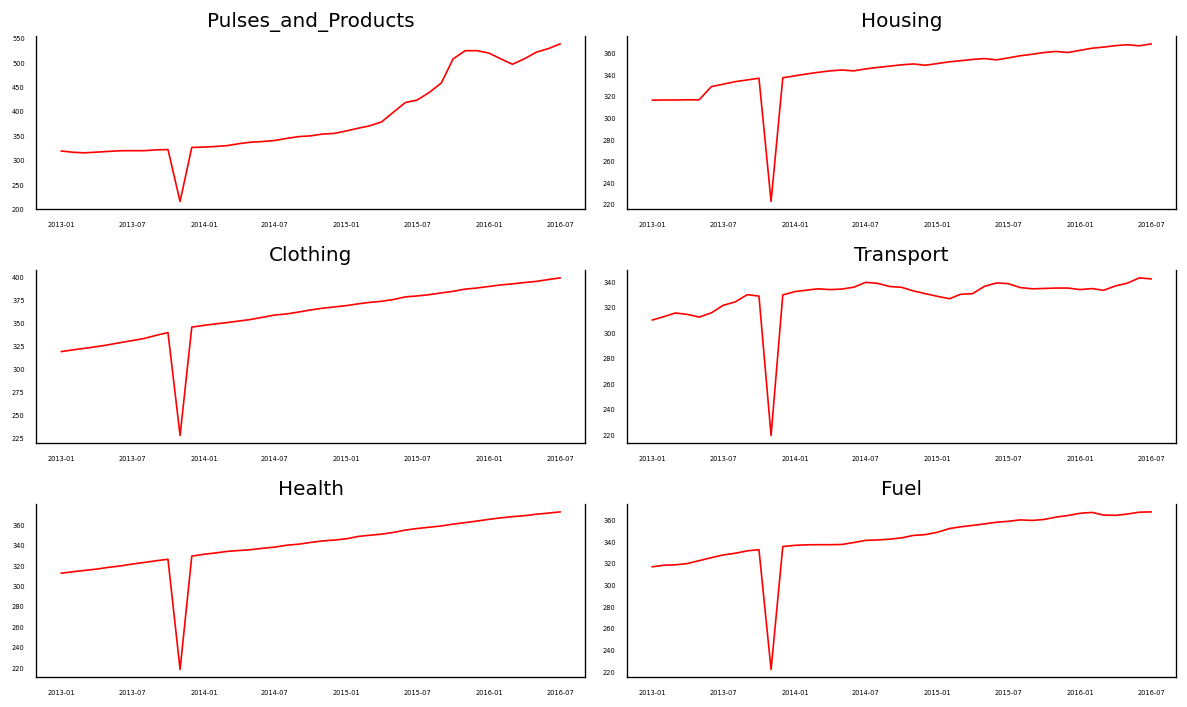

In [29]:
# TIME SERIES FORECASTING using Vector autoregression model(VAR)
#visualize variables

fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = newdata[newdata.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    
    ax.set_title(newdata.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params (labelsize=4)
    
plt.tight_layout();



In [30]:
#Stionary Dickey-Fuller test 
#Pulses and Products
ad_fuller_result_1 =adfuller(newdata['Pulses_and_Products'])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#diff
ad_fuller_result_1 =adfuller(newdata['Pulses_and_Products'].diff()[1:])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#Housing variable
ad_fuller_result_1 =adfuller(newdata['Housing'])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#diff
ad_fuller_result_1 =adfuller(newdata['Housing'].diff()[1:])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#Clothing variable
ad_fuller_result_1 =adfuller(newdata['Clothing'])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#diff
ad_fuller_result_1 =adfuller(newdata['Clothing'].diff()[1:])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#Transport variable
ad_fuller_result_1 =adfuller(newdata['Transport'])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#diff
ad_fuller_result_1 =adfuller(newdata['Transport'].diff()[1:])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#Health variable
ad_fuller_result_1 =adfuller(newdata['Health'])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#diff
ad_fuller_result_1 =adfuller(newdata['Health'].diff()[1:])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#Fuel variable
ad_fuller_result_1 =adfuller(newdata['Fuel'])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')
#diff
ad_fuller_result_1 =adfuller(newdata['Fuel'].diff()[1:])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')

ADF Statistic: 0.2473265416118735
p-value:0.9747945199950344
ADF Statistic: -8.95655836406942
p-value:8.44333263776967e-15
ADF Statistic: -10.517716358321582
p-value:9.864735434641275e-19
ADF Statistic: -10.759472449300342
p-value:2.542595312397549e-19
ADF Statistic: -12.267372833259104
p-value:8.797724529062638e-23
ADF Statistic: -10.879650790469283
p-value:1.304615391467838e-19
ADF Statistic: -5.320262138608998
p-value:4.970551898514679e-06
ADF Statistic: -10.476223357924505
p-value:1.2470391017391115e-18
ADF Statistic: -9.148262320747797
p-value:2.730402117310084e-15
ADF Statistic: -10.788783673771338
p-value:2.1597911333952598e-19
ADF Statistic: -13.699478012271946
p-value:1.29787809558337e-25
ADF Statistic: -10.794971972369865
p-value:2.0867261014639754e-19


In [31]:
#Checking correlation Granger Causality Test
print ('Housing causes Pulses_and_Products ?\n')
granger_1 = grangercausalitytests(newdata[['Pulses_and_Products', 'Housing']],4)

print ('Pulses_and_Products causes Housing?\n')
granger_1 = grangercausalitytests(newdata[['Housing','Pulses_and_Products' ]],4)

Housing causes Pulses_and_Products ?


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.8334 , p=0.0004  , df_denom=39, df_num=1
ssr based chi2 test:   chi2=15.9744 , p=0.0001  , df=1
likelihood ratio test: chi2=13.5380 , p=0.0002  , df=1
parameter F test:         F=14.8334 , p=0.0004  , df_denom=39, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.5994  , p=0.0018  , df_denom=36, df_num=2
ssr based chi2 test:   chi2=17.3097 , p=0.0002  , df=2
likelihood ratio test: chi2=14.4400 , p=0.0007  , df=2
parameter F test:         F=7.5994  , p=0.0018  , df_denom=36, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.9785  , p=0.0059  , df_denom=33, df_num=3
ssr based chi2 test:   chi2=18.1037 , p=0.0004  , df=3
likelihood ratio test: chi2=14.9340 , p=0.0019  , df=3
parameter F test:         F=4.9785  , p=0.0059  , df_denom=33, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test

In [32]:
#two columns for testing
newdata = newdata[['Pulses_and_Products', 'Housing']]
print(newdata.shape)

(43, 2)


In [34]:
#Converting to the('float')type
newdata['Pulses_and_Products'] = newdata['Pulses_and_Products'].astype(float, errors = 'raise')
newdata['Housing'] = newdata['Housing'].astype(float, errors = 'raise')

In [35]:
#split data in training and testing 
train_df = newdata[:-12]
test_df = newdata[-12:]#last 12 values in the testing part
print(test_df.shape)

(12, 2)


In [36]:
#Number of Lag consideration
model = VAR(train_df.diff()[1:])
sorted = model.select_order(maxlags=9)
print(sorted.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       10.73       10.83   4.574e+04       10.75
1       10.36       10.66   3.159e+04       10.42
2       10.20       10.70   2.738e+04       10.31
3       10.10       10.79   2.555e+04       10.25
4       10.34       11.23   3.469e+04       10.53
5       9.682       10.78   2.019e+04       9.920
6       9.391       10.68   1.819e+04       9.671
7       9.542       11.03   2.879e+04       9.865
8       9.693       11.38   5.736e+04       10.06
9      4.770*      6.660*      1265.*      5.180*
-------------------------------------------------


In [39]:
#Fitting to model
var_model = VARMAX(train_df, order=(5,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
#print(fitted_model())

In [40]:
#Forecasting
n_forecast = 24
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions = predict.predicted_mean
predictions

,Pulses_and_Products,Housing
2015-08-01,452.604193,382.704157
2015-09-01,458.512425,393.539215
2015-10-01,430.111948,365.588222
2015-11-01,393.243206,332.914025
2015-12-01,381.716448,324.309555
2016-01-01,361.017036,312.628246
2016-02-01,348.852016,308.518019
2016-03-01,332.416041,302.334266
2016-04-01,322.834236,299.296147
2016-05-01,308.423691,292.073584


In [41]:
#test data variables vs prediction
test_vs_pred = pd.concat([test_df, predictions], axis=1)

<AxesSubplot:>

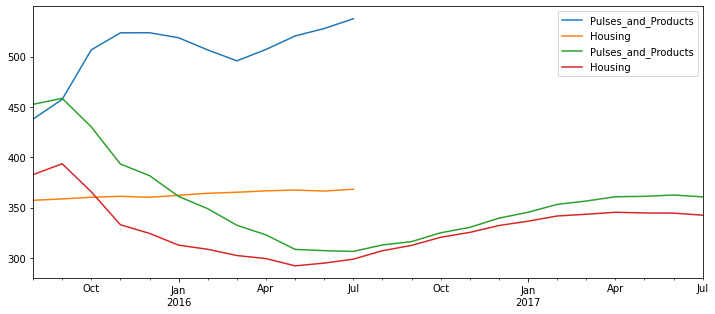

In [42]:
#plot prediction
test_vs_pred.plot(figsize=(12,5))